### Importing Libraries and Checking Permission of Scraping

In [211]:
from bs4 import BeautifulSoup
import requests
url="https://www.trendyol.com/sr?q=koton&qt=koton&st=koton&os=1&pi=1"
html_text=requests.get(url)
html_text

<Response [200]>

### Finding URLs to Scrape

In [212]:
brands=["defacto","koton","nike","adidas",
        "apple","puma","pull%20and%20bear","bershka","samsung",
       "penti","mavi","mango"]
to_scrape=[]
for i in range(1,10):
    for brand in brands:
    

        urll="https://www.trendyol.com/sr?q="+brand+"&qt="+brand+"&st="+brand+"&os=1&pi="+str(i)
        to_scrape.append(urll)
        
urls=to_scrape

### Pulling Data in XML Format & Extracting Features of Product

In [213]:
import numpy as np
with open("finall_trendyol.txt","w",encoding="utf-8") as f:    
    f.write("Brand,Product,Price,Reviews,Like,Seller Rank\n")
    for url in urls:
        html_text=requests.get(url)
        soup=BeautifulSoup(html_text.text,"lxml")
        prods=soup.find_all("div",class_="p-card-wrppr")
        for prod in prods:
            more=prod.a["href"]
        
            url2="https://www.trendyol.com/"+more
        
            html_text2=requests.get(url2)
            soup2=BeautifulSoup(html_text2.text,"lxml")
            try:    
                like=soup2.find("div",class_="fv-dt").text.split()[0]
                
            except:
                like=np.nan
            try:    
                shipment_due_in=soup2.find("div",class_="pr-dd").text.split(":")[1].split()[0]
            
            except:
                shipment_due_in=np.nan
                
            try:
                color=soup2.find("li",class_="detail-attr-item")
            except:
                color=np.nan
            try:    
                seller_rank=soup2.find("div",class_="sl-pn").text
            
            except:
                seller_rank=np.nan
               
            try:
                brand=prod.find("span",class_="prdct-desc-cntnr-ttl").text
            except:
                brand = np.nan
            try:
                prods_name=prod.find("span",class_="prdct-desc-cntnr-name hasRatings").text
            except:
                prods_name = np.nan
            try:
                price_in_tl=prod.find("div",class_="prc-box-dscntd").text.split()[0]
                price=price_in_tl.split(",")
                if len(price)==2:
                    price_in_tl=price[1]
            except:
                price_in_tl = np.nan
            try:
                review_count=prod.find("span",class_="ratingCount").text[1:-1]
            except:
                review_count = np.nan

            f.write(brand+",")
            f.write(str(prods_name)+",")
            f.write(price_in_tl+",")
            f.write(str(review_count)+",")
            f.write(str(like)+",")
            f.write(str(seller_rank))
            
            f.write("\n")
print("Done")


Done


###### For individual extraction of data,

"""brand=soup.find("span",class_="prdct-desc-cntnr-ttl").text
prod=soup.find("span",class_="prdct-desc-cntnr-name hasRatings").text
price_in_tl=soup.find("div",class_="prc-box-dscntd").text.split()[0]
review_count=soup.find("span",class_="ratingCount").text""" 

In [240]:
import pandas as pd

df = pd.read_csv("trend.csv", on_bad_lines='skip')

In [241]:
df.head()

,Brand,Product,Price,Reviews,Like,Seller Rank
0,Defacto,Kadın Pink Parfüm 50 Ml L8103AZNSPN,99.0,2538.0,82401.0,9.5
1,Defacto,Kadın Trendy Girl Elegant Parfüm 50 Ml K0437AZ...,99.0,211.0,12024.0,9.3
2,Defacto,Slogan Payet Baskılı Relax Fit Kısa Kollu Tişört,99.0,8.0,421.0,NaN
3,Defacto,Regular Fit V Yaka Kısa Kollu Tişört,99.0,482.0,57310.0,NaN
4,Defacto,Kadın Suni Deri 3'lü Elbise Kemeri,99.0,815.0,50290.0,NaN


As seen, unwanted stores appeared in dataframe. Let us clean them.

In [242]:
bran=["Defacto","Koton","Nike","adidas",
        "Apple","puma","Bershka","Samsung",
       "Penti","Mavi","Mango"]
df=df[df["Brand"].isin(bran)]
df

,Brand,Product,Price,Reviews,Like,Seller Rank
0,Defacto,Kadın Pink Parfüm 50 Ml L8103AZNSPN,99.0,2538.0,82401.0,9.5
1,Defacto,Kadın Trendy Girl Elegant Parfüm 50 Ml K0437AZ...,99.0,211.0,12024.0,9.3
2,Defacto,Slogan Payet Baskılı Relax Fit Kısa Kollu Tişört,99.0,8.0,421.0,NaN
3,Defacto,Regular Fit V Yaka Kısa Kollu Tişört,99.0,482.0,57310.0,NaN
4,Defacto,Kadın Suni Deri 3'lü Elbise Kemeri,99.0,815.0,50290.0,NaN
...,...,...,...,...,...,...
2569,Mango,NaN,99.0,NaN,435.0,NaN
2570,Mango,Orta Bel Wide-leg Jean,99.0,15.0,1335.0,NaN
2571,Mango,Dökümlü Desenli Gömlek,99.0,7.0,1375.0,NaN
2572,Mango,Streç Mom Jean,99.0,75.0,11597.0,NaN


In [243]:
df.drop(df[df["Brand"].isin(["Samsung","Apple"])].index,inplace=True)

## Exploration of Data

In [244]:
df.dtypes

Brand           object
Product         object
Price          float64
Reviews        float64
Like           float64
Seller Rank    float64
dtype: object

In [245]:
df.isnull().sum()

Brand             0
Product         190
Price             0
Reviews         190
Like             28
Seller Rank    1300
dtype: int64

In [246]:
df["Product"].dropna(inplace=True)
df["Reviews"].fillna("0",inplace=True)
df["Like"].fillna("0",inplace=True)
df.isnull().sum()

Brand             0
Product         190
Price             0
Reviews           0
Like              0
Seller Rank    1300
dtype: int64

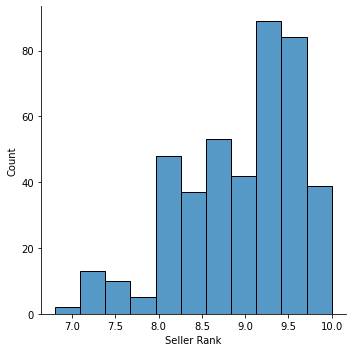

In [247]:
import seaborn as sns
sns.displot(df["Seller Rank"])

In [248]:
df["Seller Rank"].mean()

8.960189573459715

###### NOTE:
As we can see our rank is mostly distributed in 9-10 range. If we check mean of it we find it 9.1. We can use mean imputation technique in this model. Clearly we do not have large range (7-10) and it cannot go beyond.

In [249]:
df["Seller Rank"].fillna(float(df['Seller Rank'].mean()), inplace=True)

In [250]:
df.isnull().sum()

Brand            0
Product        190
Price            0
Reviews          0
Like             0
Seller Rank      0
dtype: int64

In [251]:
df["Like"]=df["Like"].astype("int")
df["Reviews"]=df["Reviews"].astype("int")

In [252]:
df.describe()

,Price,Reviews,Like,Seller Rank
count,1722.000000,1722.000000,1722.000000,1722.000000
mean,142.084407,156.911150,8651.277003,8.960190
std,183.386153,780.629552,18357.793166,0.349309
min,1.000000,0.000000,0.000000,6.800000
25%,95.000000,5.000000,1287.250000,8.960190
50%,99.000000,24.000000,3303.500000,8.960190
75%,99.000000,82.750000,9050.250000,8.960190
max,999.000000,20005.000000,271203.000000,10.000000


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1722 entries, 0 to 2573
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        1722 non-null   object 
 1   Product      1532 non-null   object 
 2   Price        1722 non-null   float64
 3   Reviews      1722 non-null   int32  
 4   Like         1722 non-null   int32  
 5   Seller Rank  1722 non-null   float64
dtypes: float64(2), int32(2), object(2)
memory usage: 80.7+ KB


### Let us compare popularities of our brands with respect to their review count.

In [254]:
df_=df.groupby("Brand").sum()

In [255]:
df_["Brand"]=df_.index

In [256]:
df_=df_.sort_values("Price",ascending=False)
df_

,Price,Reviews,Like,Seller Rank,Brand
Brand,,,,,
adidas,68718.958,31904,1643656,1910.139336,adidas
Nike,55262.291,21140,1753693,1953.300474,Nike
Mavi,22472.000,41236,1852663,1945.537915,Mavi
Mango,21371.000,6293,1193436,1935.400948,Mango
Defacto,21286.000,36943,2171292,1947.214692,Defacto
Koton,19598.000,9954,653782,1900.807109,Koton
Penti,18616.000,108757,2972189,1946.445972,Penti
Bershka,17345.099,13974,2656788,1890.600000,Bershka


Text(0.5, 1.0, 'Distribution of Market')

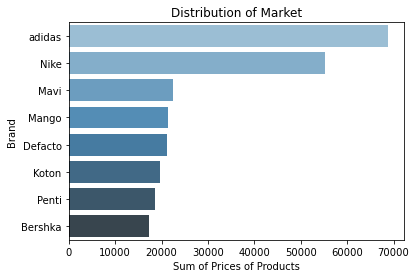

In [257]:
import matplotlib.pyplot as plt
sns.barplot(y="Brand", x="Price", data=df_,orient="h"
                 ,palette="Blues_d")
plt.xlabel("Sum of Prices of Products")
plt.title("Distribution of Market")

You can see total volume distribution of brands' products in the market. Adidas and Nike seems to compose almost half of the market. This chart indicates sum of prices of products which each brand listed on trendyol.

### Let us compare quality of our brands with respect to their like count.

Text(0.5, 1.0, 'Popularities of Brands')

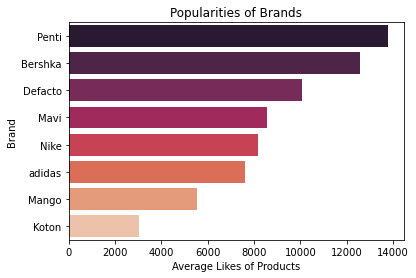

In [258]:
df_=df.groupby("Brand").mean()
df_["Brand"]=df_.index
df_=df_.sort_values("Like",ascending=False)
sns.barplot(y="Brand", x="Like", data=df_,orient="h"
                 ,palette="rocket")
plt.xlabel("Average Likes of Products")
plt.title("Popularities of Brands")

You can see customer satisfaction rate is at most in Penti. It is followed by Bershka, Apple, Defacto so on. Even though adidas and Nike sells the most expensive products, these products do not seem to satisfy customers. Koton also seems in the same situation. Mavi seems moderate

In [259]:
df.columns

Index(['Brand', 'Product', 'Price', 'Reviews', 'Like', 'Seller Rank'], dtype='object')

## Checking Fake Stores

Let us also check the rank of the stores of the brands. The reason for adidas and Nike has low customer satisfaction, may be fake products. If the rank of the stores comes out low, we can predict so.

In [260]:
df.groupby("Brand").mean().sort_values("Seller Rank",ascending=False)

,Price,Reviews,Like,Seller Rank
Brand,,,,
Nike,257.033912,98.325581,8156.711628,9.085118
Defacto,98.546296,171.032407,10052.277778,9.014883
Penti,86.185185,503.504630,13760.134259,9.011324
Mavi,104.037037,190.907407,8577.143519,9.007120
Bershka,82.204261,66.227488,12591.412322,8.960190
Mango,98.939815,29.134259,5525.166667,8.960190
adidas,318.143324,147.703704,7609.518519,8.843238
Koton,90.731481,46.083333,3026.768519,8.800033


The situation occured in adidas. Since nike has high seller rank relatively adidas, there might be fake product sales in adidas. We can infer this from the fact that both adidas and nike relatively low popularity, however adidas has gradually low in seller rank. Again, probably reason for that is fake product sales. 

In [261]:
df.columns

Index(['Brand', 'Product', 'Price', 'Reviews', 'Like', 'Seller Rank'], dtype='object')

## Examining Correlance

<AxesSubplot:>

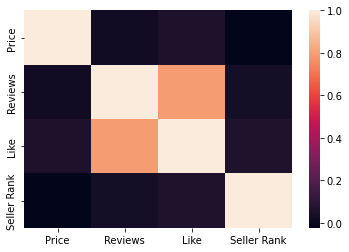

In [262]:
sns.heatmap(df.corr())


You can see there is strong correlance between reviews and likes of products as expected. 

There is also correlance between price and like,again, as expected.

Defacto    216
Koton      216
adidas     216
Penti      216
Mavi       216
Mango      216
Nike       215
Bershka    211
Name: Brand, dtype: int64

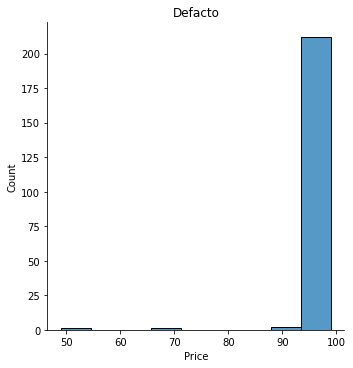

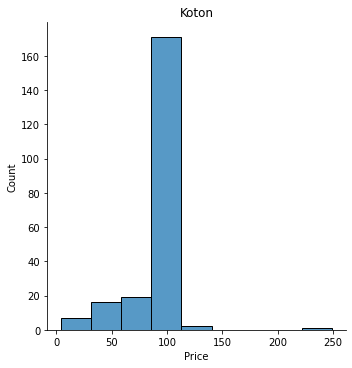

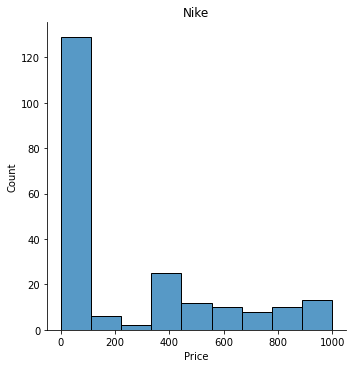

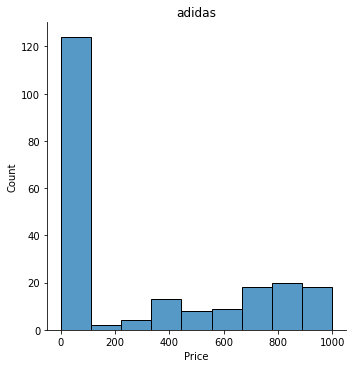

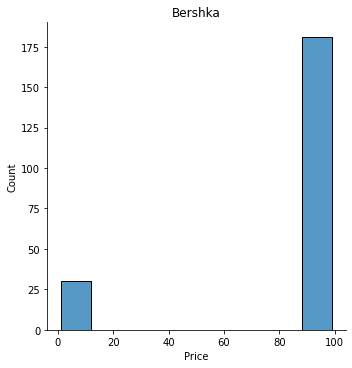

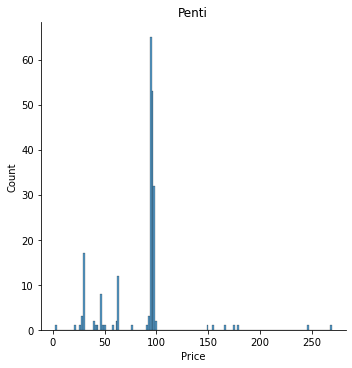

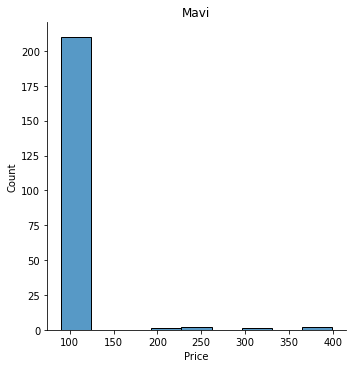

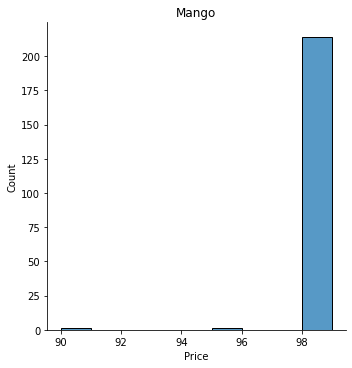

In [263]:
bran=["Defacto","Koton","Nike","adidas",
        "Bershka", 
       "Penti","Mavi","Mango"]
for a in bran:
    sns.displot(df[df["Brand"]==a]["Price"])
    plt.title(a)
df.Brand.value_counts()

You can see mango mavi, koton, defacto even bershka are distributed in small interval. However, adidas, Nike etc seems to have large price range.

In [264]:
df.columns

Index(['Brand', 'Product', 'Price', 'Reviews', 'Like', 'Seller Rank'], dtype='object')

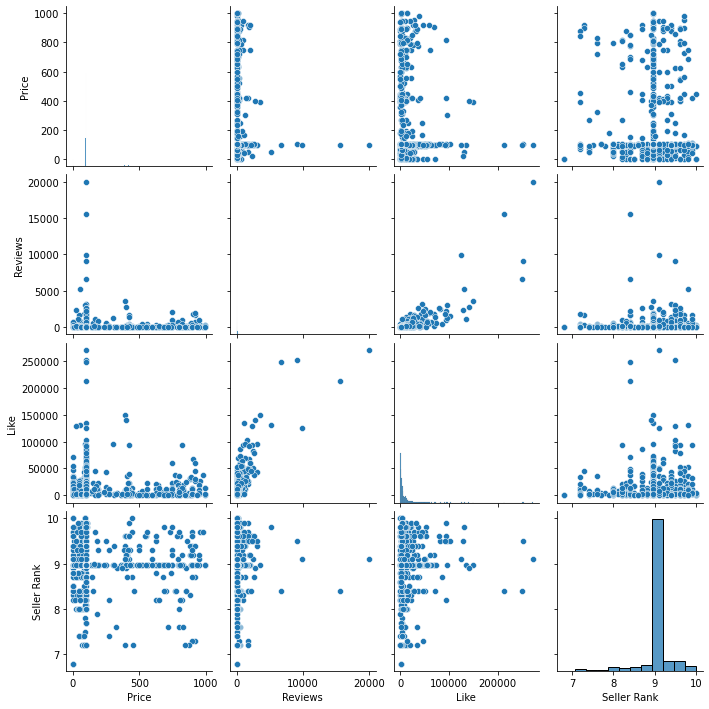

In [265]:
sns.pairplot(df)

From these pairplots we can infer products are clustered high seller rank low prices in price-seller rank perspective. Moreover, there seems tendency as reviews increases likes are also increased as expected. Also likes are clustered at high seller rank numbers (8-10) as expected. 